In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
columns = ['class', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps', 
           'deg-malig', 'breast', 'breast-quad', 'irradiat']
df = pd.read_csv('./data/breast-cancer.data', names=columns)
df.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [63]:
group = df.groupby(['class', 'age']).count()
ages = sorted(np.unique(group.index.get_level_values(1)))
classes = sorted(np.unique(group.index.get_level_values(0)))
group

menopause  tumor-size  inv-nodes  node-caps  \
class                age                                                  
no-recurrence-events 20-29          1           1          1          1   
                     30-39         21          21         21         21   
                     40-49         63          63         63         63   
                     50-59         71          71         71         71   
                     60-69         40          40         40         40   
                     70-79          5           5          5          5   
recurrence-events    30-39         15          15         15         15   
                     40-49         27          27         27         27   
                     50-59         25          25         25         25   
                     60-69         17          17         17         17   
                     70-79          1           1          1          1   

                            deg-malig  breast  breast-quad  irradiat  
class                age                                              
no-recurrence-events 20-29          1       1            1         1  
                     30-39         21      21           21        21  
                     40-49         63      63           63        63  
                     50-59         71      71           71        71  
                     60-69         40      40           40        40  
                     70-79          5       5            5         5  
recurrence-events    30-39         15      15           15        15  
                     40-49         27      27           27        27  
                     50-59         25      25           25        25  
                     60-69         17      17           17        17  
                     70-79          1       1            1         1

In [76]:
print(group.loc[classes[0], :].loc[ages[2], :][0])
print(group.loc[classes[1], :].loc[ages[2], :][0])

63
27


[Text(0, 0, '20-29'),
 Text(0, 0, '30-39'),
 Text(0, 0, '40-49'),
 Text(0, 0, '50-59'),
 Text(0, 0, '60-69'),
 Text(0, 0, '70-79')]

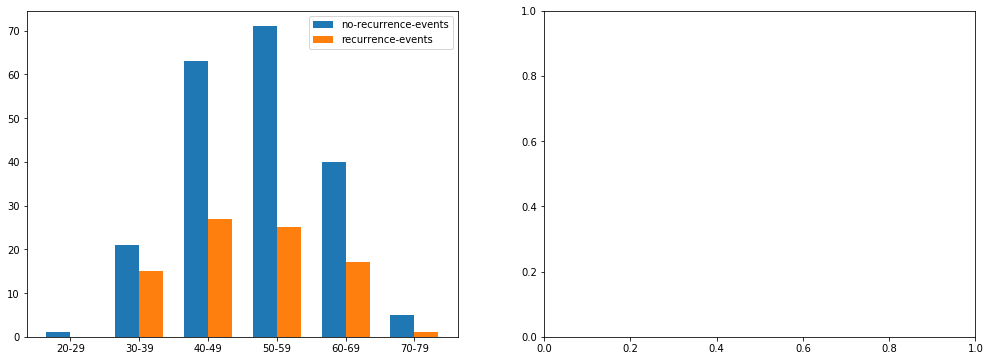

In [101]:
bar1, bar2 = [], []

for age in ages:
    try:
        b1 = group.loc[classes[0], :].loc[age, :][0]
    except KeyError:
        b1 = 0
    try:
        b2 = group.loc[classes[1], :].loc[age, :][0]
    except KeyError:
        b2 = 0
        
    bar1.append(b1); bar2.append(b2);

fig, ax = plt.subplots(1, 2, figsize=(17, 6))
width = 0.35
x = np.arange(len(ages))
ax[0].bar(x-width/2, bar1, width, label=classes[0])
x = x+width
ax[0].bar(x-width/2, bar2, width, label=classes[1])
ax[0].legend()
ax[0].set_xticks(x-width)
ax[0].set_xticklabels(ages)